In [1]:
import yfinance as yf
import numpy as np

In [2]:
ticker = "MSFT"
data = yf.download(ticker, interval='1d', period='10y') # if error occurs at train test size i.e. it says no data then changle interval to '5m' and period to '5d'\n",
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2015-03-19,36.499363,36.758284,36.438948,36.473469,33879100
2015-03-20,37.008587,37.094893,36.671989,36.732404,71904500
2015-03-23,36.991329,37.224359,36.922282,37.008591,26246100
2015-03-24,37.025837,37.258864,36.896375,36.922266,25513300
2015-03-25,35.783028,37.051747,35.765766,37.043114,43469900


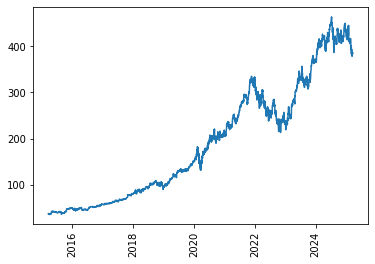

In [8]:
import matplotlib.pyplot as plt
plt.plot(np.array(data.index), data[("Open", "MSFT")].values)
plt.xticks(rotation=90)
plt.show()

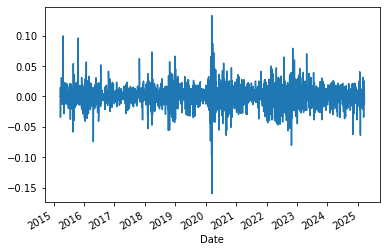

In [9]:
# Log-difference to stationarize the series
stationary_series = np.log(data[("Close", ticker)]).diff().dropna()
stationary_series.plot()
plt.show()

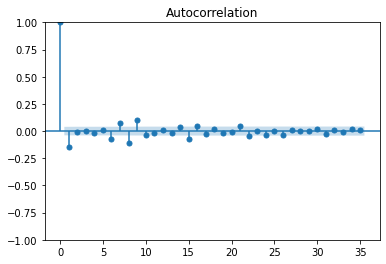

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(stationary_series, alpha=.05)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

# Fit an ARMA model (ARIMA with d=0)
model = ARIMA(stationary_series, order=(1, 0, 1))
arma_results = model.fit()
#print(arma_results.summary())

# Fit a simple GARCH(1,1) model
garch = arch_model(stationary_series, p=1, q=1)
garch_results = garch.fit(disp='off')
#print(garch_results.summary())

# Forecast with ARMA
arma_forecast = arma_results.forecast(steps=5)
#print("ARMA Forecast:\n", arma_forecast)

# Forecast volatility with GARCH
garch_forecast = garch_results.forecast(horizon=5)
print("GARCH Forecast:\n", garch_forecast.mean.tail(1))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA Forecast:
 2515    0.000246
2516    0.000905
2517    0.000937
2518    0.000938
2519    0.000939
Name: predicted_mean, dtype: float64
GARCH Forecast:
                  h.1       h.2       h.3       h.4       h.5
Date                                                        
2025-03-19  0.001146  0.001146  0.001146  0.001146  0.001146


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002901. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supp